In [1]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
    
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        dataset.append([waveform, sample_rate, label])
        
    return dataset

In [48]:
import os
import re
root = '/mnt/c/Downloads/se16/'

re_mcr = r'^rec_mcr'
re_noise16 = r'SE16$'
re_noise32 = r'SE32$'
re_bl = r'^BL'
mcr, bl, noise16, noise32 = [], [], [], []
for i in os.listdir(root):
    if re.search(re_mcr, i):
        mcr += load_audio_files(root+i+'/', 'microwave')
    elif re.search(re_noise16, i):
        noise16 += load_audio_files(root+i+'/', 'nothing')
    elif re.search(re_noise32, i):
        noise32 += load_audio_files(root+i+'/', 'nothing')
    elif re.search(re_bl, i):
        bl += load_audio_files(root+i+'/', 'blender')

In [49]:
print(f'Length of mcr dataset: {len(mcr)}')
print(f'Length of blender dataset: {len(bl)}')
print(f'Length of noise16 dataset: {len(noise16)}')
print(f'Length of noise32 dataset: {len(noise32)}')

Length of mcr dataset: 10
Length of blender dataset: 5
Length of noise16 dataset: 10
Length of noise32 dataset: 5


In [53]:
mbl = load_audio_files('/home/nschdeva/mci/CS8803-mci-project/cs8803-mci-audio/blender_1/', 'mbl')
print(f'Length of mbl dataset: {len(mbl)}')

Length of mbl dataset: 2


Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0547,  0.0391, -0.0078]])
Sample rate: 8000
Labels: mbl 

Shape of transformed waveform: torch.Size([1, 4000])
Sample rate: 800.0


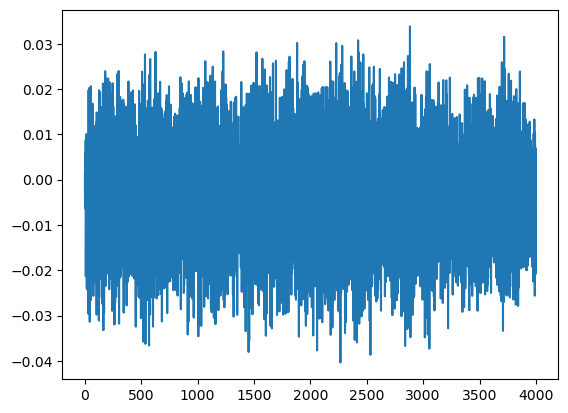

In [60]:
show_waveform(mbl_waveform, mbl_sample_rate, 'mbl')

In [59]:
one_waveform = mcr[0][0]
one_sample_rate = mcr[0][1]
print(f'one Waveform: {one_waveform}')
print(f'one Sample Rate: {one_sample_rate}')
print(f'one Label: {mcr[0][2]}\n')

bl_waveform = bl[0][0]
bl_sample_rate = bl[0][1]
print(f'bl Waveform: {bl_waveform}')
print(f'bl Sample Rate: {bl_sample_rate}')
print(f'bl Label: {bl[0][2]}\n')
mbl_waveform = mbl[1][0]
mbl_sample_rate = mbl[1][1]
print(f'mbl Waveform: {mbl_waveform}')
print(f'mbl Sample Rate: {mbl_sample_rate}')
print(f'mbl Label: {mbl[1][2]}\n')

two_waveform = noise16[0][0]
two_sample_rate = noise16[0][1]
print(f'Noise 16 Waveform: {two_waveform}')
print(f'Noise 16 Sample Rate: {two_sample_rate}')
print(f'Noise 16 Label: {noise16[0][2]}')

three_waveform = noise32[0][0]
three_sample_rate = noise32[0][1]
print(f'Noise 32 Waveform: {three_waveform}')
print(f'Noise 32 Sample Rate: {three_sample_rate}')
print(f'Noise 32 Label: {noise32[0][2]}')

one Waveform: tensor([[0.0008, 0.0008, 0.0010,  ..., 0.0016, 0.0016, 0.0016]])
one Sample Rate: 44100
one Label: microwave

bl Waveform: tensor([[-0.0007, -0.0008, -0.0007,  ..., -0.0025, -0.0025, -0.0026]])
bl Sample Rate: 44100
bl Label: blender

mbl Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0547,  0.0391, -0.0078]])
mbl Sample Rate: 8000
mbl Label: mbl

Noise 16 Waveform: tensor([[0.0063, 0.0065, 0.0064,  ..., 0.0019, 0.0019, 0.0019]])
Noise 16 Sample Rate: 44100
Noise 16 Label: nothing
Noise 32 Waveform: tensor([[-0.0056, -0.0056, -0.0054,  ...,  0.0040,  0.0041,  0.0038]])
Noise 32 Sample Rate: 44100
Noise 32 Label: nothing


In [56]:
def show_waveform(waveform, sample_rate, label):
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))
    new_sample_rate = sample_rate/10
   
    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())

Waveform: tensor([[0.0008, 0.0008, 0.0010,  ..., 0.0016, 0.0016, 0.0016]])
Sample rate: 44100
Labels: mcr 

Shape of transformed waveform: torch.Size([1, 220500])
Sample rate: 4410.0


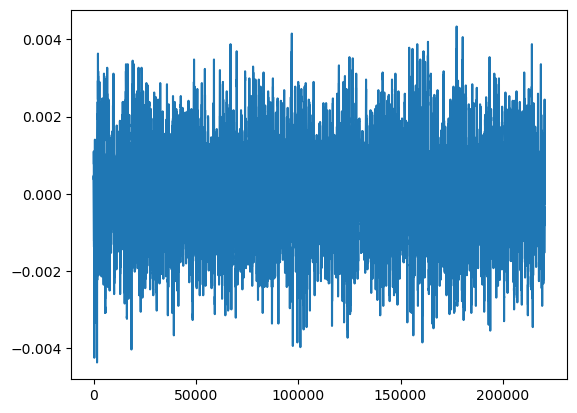

In [40]:
show_waveform(one_waveform, one_sample_rate, 'mcr')

Waveform: tensor([[-0.0007, -0.0008, -0.0007,  ..., -0.0025, -0.0025, -0.0026]])
Sample rate: 44100
Labels: blender 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


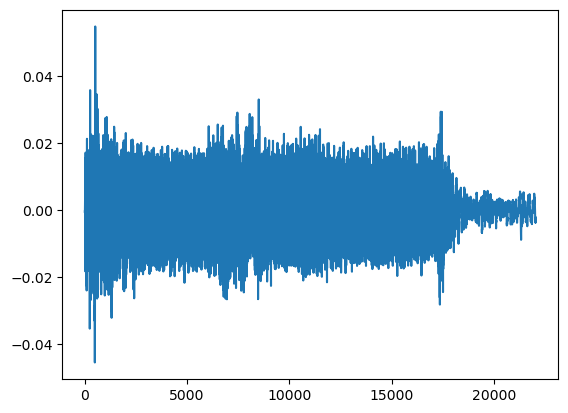

In [58]:
show_waveform(bl_waveform, bl_sample_rate, 'blender')

Waveform: tensor([[0.0063, 0.0065, 0.0064,  ..., 0.0019, 0.0019, 0.0019]])
Sample rate: 44100
Labels: noise16 

Shape of transformed waveform: torch.Size([1, 220500])
Sample rate: 4410.0


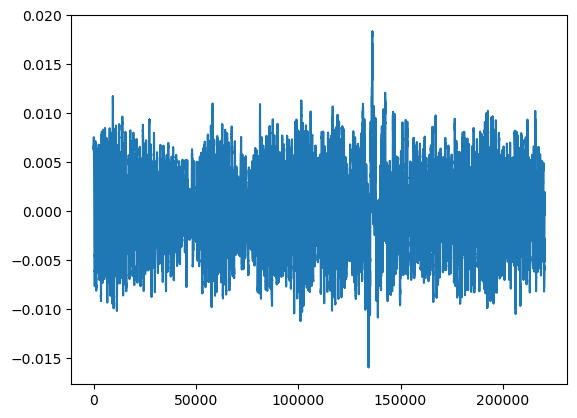

In [41]:
show_waveform(two_waveform, two_sample_rate, 'noise16')

Waveform: tensor([[-0.0056, -0.0056, -0.0054,  ...,  0.0040,  0.0041,  0.0038]])
Sample rate: 44100
Labels: noise32 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


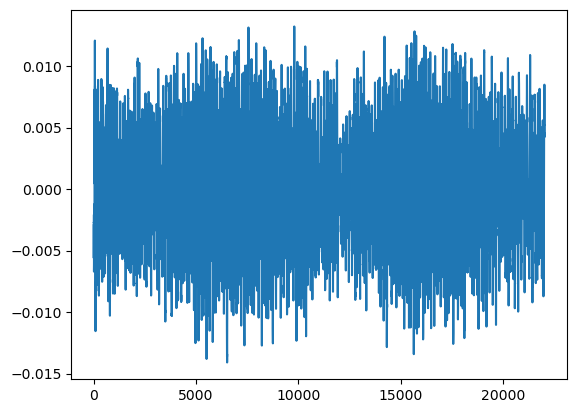

In [18]:
show_waveform(three_waveform, three_sample_rate, 'noise32')

In [23]:
def show_spectrogram(waveform_classA, waveform_classB, waveform_classC):
    one_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of one spectrogram: {}".format(one_spectrogram.size()))
    
    two_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of two spectrogram: {}".format(two_spectrogram.size()))

    three_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classC)
    print("Shape of three spectrogram: {}".format(three_spectrogram.size()))

    plt.figure()
    plt.subplot(3, 1, 1)
    plt.title("Features of {}".format('one'))
    plt.imshow(one_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.subplot(3, 1, 2)
    plt.title("Features of {}".format('two'))
    plt.imshow(two_spectrogram.log2()[0,:,:].numpy(), cmap='viridis') 

    plt.subplot(3, 1, 3)
    plt.title("Features of {}".format('three'))
    plt.imshow(three_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')   


Shape of one spectrogram: torch.Size([1, 201, 1103])
Shape of two spectrogram: torch.Size([1, 201, 1103])
Shape of three spectrogram: torch.Size([1, 201, 1103])


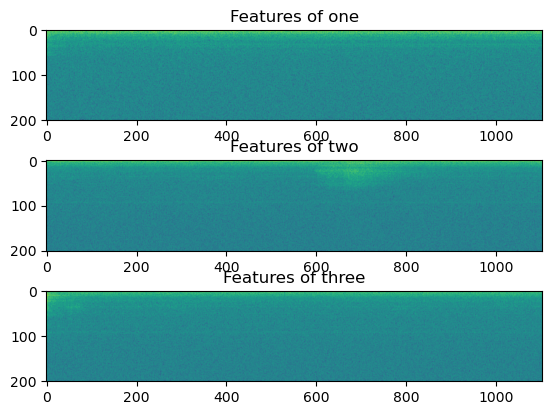

In [24]:
show_spectrogram(one_waveform, two_waveform, three_waveform)


Shape of one spectrogram: torch.Size([1, 201, 201])
Shape of two spectrogram: torch.Size([1, 201, 1103])
Shape of three spectrogram: torch.Size([1, 201, 1103])


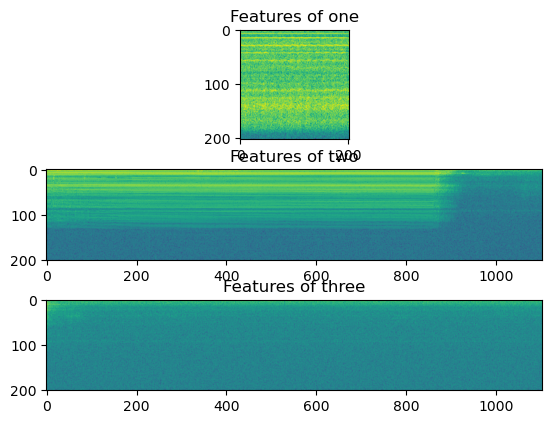

In [63]:
show_spectrogram(mbl_waveform, bl_waveform, three_waveform)

In [72]:
def show_spectrogram_samples(waveform_classA):
    one_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of one spectrogram: {}".format(one_spectrogram.size()))
    
    two_spectrogram = torchaudio.transforms.Spectrogram(1000)(waveform_classA)
    print("Shape of two spectrogram: {}".format(two_spectrogram.size()))

    three_spectrogram = torchaudio.transforms.Spectrogram(8000)(waveform_classA)
    print("Shape of three spectrogram: {}".format(three_spectrogram.size()))

    plt.figure()
    plt.subplot(3, 1, 1)
    plt.title("Features of {}".format('one'))
    plt.imshow(one_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.subplot(3, 1, 2)
    plt.title("Features of {}".format('two'))
    plt.imshow(two_spectrogram.log2()[0,:,:].numpy(), cmap='viridis') 

    plt.subplot(3, 1, 3)
    plt.title("Features of {}".format('three'))
    plt.imshow(three_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')   


Shape of one spectrogram: torch.Size([1, 201, 1103])
Shape of two spectrogram: torch.Size([1, 501, 442])
Shape of three spectrogram: torch.Size([1, 4001, 56])


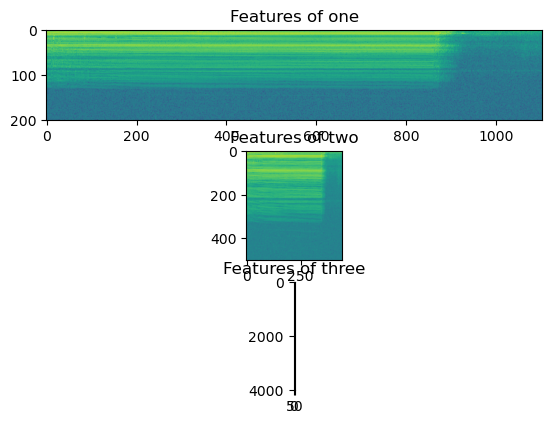

In [73]:
show_spectrogram_samples(bl_waveform)

In [25]:
def show_melspectrogram(waveform,sample_rate):
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    plt.figure()
    plt.imshow(mel_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 128, 1103])


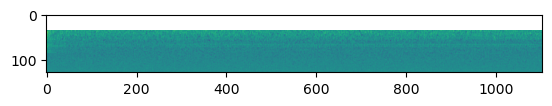

In [26]:
show_melspectrogram(one_waveform, one_sample_rate)

Shape of spectrogram: torch.Size([1, 128, 1103])


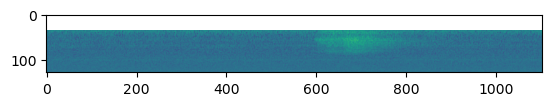

In [27]:
show_melspectrogram(two_waveform, two_sample_rate)

Shape of spectrogram: torch.Size([1, 128, 1103])


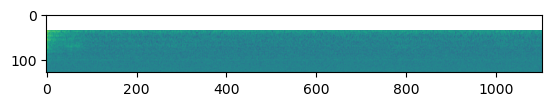

In [28]:
show_melspectrogram(three_waveform, three_sample_rate)

In [29]:
def show_mfcc(waveform,sample_rate):
    mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    plt.figure()
    fig1 = plt.gcf()
    plt.imshow(mfcc_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0,:,:].numpy())
    plt.draw()

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 40, 1103])


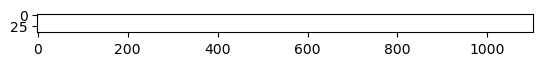

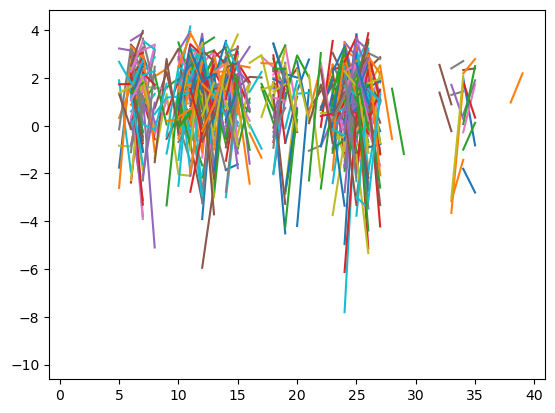

In [33]:
show_mfcc(one_waveform, one_sample_rate)

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 40, 1103])


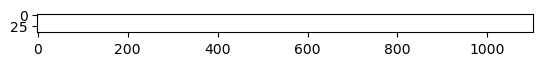

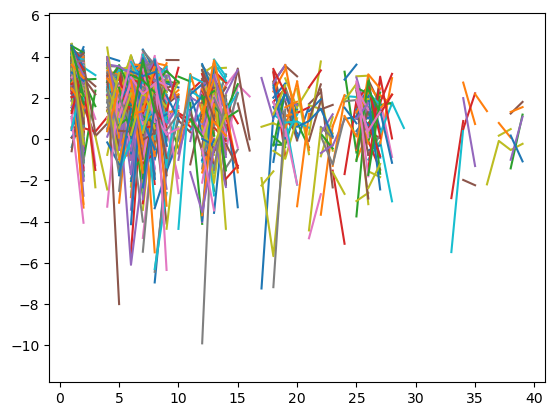

In [34]:

show_mfcc(two_waveform, two_sample_rate)

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 40, 1103])


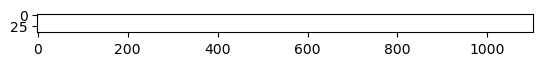

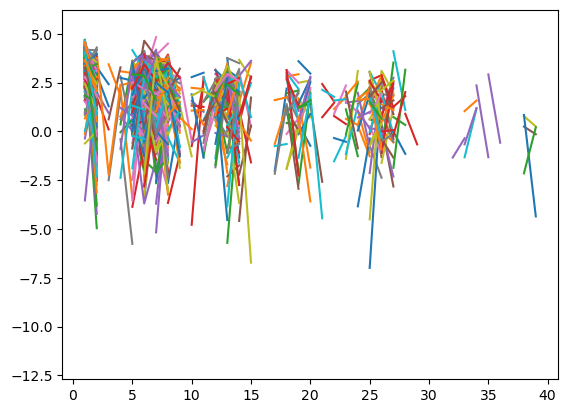

In [35]:

show_mfcc(three_waveform, three_sample_rate)